In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Linear Algebra

The study of linear sets of equations and their transformation properties. It allows the analysis of rotations in space, least squares fitting, solution of coupled differential equations and such.

In [3]:
x = np.array([[1,3,1], 
              [1,0,0]])

In [4]:
y = np.array([[0,0],
             [7,5],
             [1,1]])

In [7]:
print(x.shape)

(2, 3)


In [8]:
print(y.shape)

(3, 2)


### Basic Operations
#### Matrix Addition
an operation which sums together matrices of the same dimension.

In [9]:
arr_1 = np.array([[2,1,1], 
                  [1,2,3]])

arr_2 = np.array([[0,2,3], 
                  [4,0,0]])

arr_3 = np.array([[5,1,5],
                  [4,3,2]])

In [10]:
arr_1 + arr_2

array([[2, 3, 4],
       [5, 2, 3]])

In [12]:
try:
    x + y
except:
    print('can only add matrices if their dimensions are the same')

can only add matrices if their dimensions are the same


#### Commutative Property (交換法則)
$(x+y)+z = x+(y+z)$

In [13]:
arr_1 + arr_2 == arr_2 + arr_1

array([[ True,  True,  True],
       [ True,  True,  True]])

#### Associative Property (結合法則)
$(x + y) + z = x + (y + z)$

In [14]:
(arr_1 + arr_2) + arr_3 == arr_1 + (arr_2 + arr_3)

array([[ True,  True,  True],
       [ True,  True,  True]])

#### Visualizing Matrix Addition

In [21]:
v1 = np.array([4,4])
v2 = np.array([-1,-2])

In [22]:
def make_grid():
    plt.grid()
    plt.xticks(np.arange(-6,7,1))
    plt.yticks(np.arange(-6,7,1))
    plt.axvline(x=0, color = 'black')
    plt.axhline(y=0, color = 'black')
    plt.title("Matrix Addition")

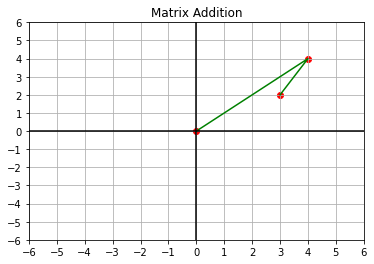

In [23]:
# plot points
plt.scatter([0, v1[0], v1[0] + v2[0]],[0, v1[1], v1[1] + v2[1]], color = 'red')
# plot line
plt.plot([0, v1[0], v1[0] + v2[0]], [0, v1[1], v1[1] + v2[1]], color = 'green')    

make_grid()

#### Scalar Multiplication

In [13]:
z = np.array([[1,0,1.5],
              [2,-2,3.5], 
              [4, -3,12.2]])

## broadcasting
z  * 2

array([[ 2. ,  0. ,  3. ],
       [ 4. , -4. ,  7. ],
       [ 8. , -6. , 24.4]])

In [14]:
v3 = np.array([2,1])

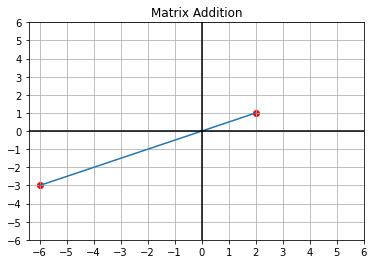

In [24]:
plt.scatter([v3[0], v3[0]*-3], [v3[1], v3[1]*-3], color = 'red')
plt.plot([v3[0], v3[0]*-3], [v3[1], v3[1]*-3])

make_grid()

### Dot Product (Matrix Multiplication)
The dot product or scalar product is an algebraic operation that takes two equal-length sequences of numbers (usually cooridnate vectors), and retruns a single number.

In [27]:
q = np.array([4,3])
r = np.array([4,1])


## (q[0]*r[0]) + (q[1]*r[1])
q.dot(r)

19

#### Commutative Property

In [29]:
q.dot(r) == r.dot(q)

True

#### Associative Property (Does not hold for matrix multiplication)

In [31]:
s = np.array([2,2])

q.dot(r.dot(s)) == s.dot(r.dot(q))

array([False, False])

### Applications of Linear Algebra
#### Working with Images (Scalar Multiplication)

The `imread` function from matplotlib reads the data from an image into a NumPy array.The pixels are represented as 8-bit unsigned integers within an array.

In [41]:
pic = plt.imread('test_image.jpg')
print(pic)
print(f'\n{pic.shape}')

[[[215 245 209]
  [217 244 209]
  [217 244 209]
  ...
  [ 34  73  54]
  [ 34  73  54]
  [ 34  73  54]]

 [[217 244 209]
  [217 244 209]
  [218 244 207]
  ...
  [ 34  73  54]
  [ 34  73  54]
  [ 34  73  54]]

 [[217 244 209]
  [218 244 207]
  [218 244 207]
  ...
  [ 34  73  54]
  [ 34  73  54]
  [ 34  73  54]]

 ...

 [[162 196 171]
  [162 196 171]
  [162 196 171]
  ...
  [ 48  95  89]
  [ 48  95  89]
  [ 48  95  89]]

 [[162 196 171]
  [162 196 171]
  [162 196 171]
  ...
  [ 48  95  89]
  [ 48  95  89]
  [ 48  95  89]]

 [[162 196 171]
  [162 196 171]
  [162 196 171]
  ...
  [ 48  95  89]
  [ 48  95  89]
  [ 48  95  89]]]

(597, 1024, 3)


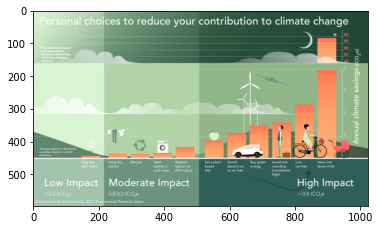

In [43]:
plt.imshow(pic)

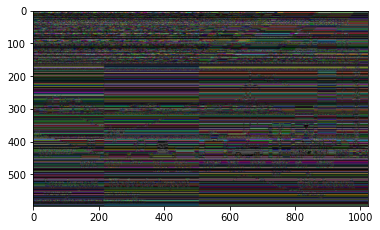

In [51]:
## obscuring image
prime_nums = []

for num in range(2,255):
    if all(num%i != 0 for i in range(2,num)):
        prime_nums.append(num)

prime_nums = prime_nums * len(pic)

np.random.shuffle(prime_nums)

random_nums = np.random.randint(0, 255, size = len(pic))

encrypted_pic = np.array([(x * (x^y)) % z for x,y,z in zip(pic, random_nums, prime_nums)])

plt.imshow(encrypted_pic)

#### One Hot Encoding (Creating a Matrix)
The process of taking categorical data (for example a data set of strings) and converting the data into numerical form (most commonly integers).

In [57]:
test_array = np.array([['Pass','Fail','Pass','Pass','Pass','Pass','Pass',],
                       ['Pass','Pass','Pass','Fail','Pass','Pass','Pass',],
                       ['Pass','Pass','Pass','Pass','Pass','Fail','Pass',],
                       ['Fail','Pass','Pass','Pass','Pass','Pass','Pass',],
                       ['Pass','Pass','Fail','Pass','Pass','Pass','Pass',],
                       ['Pass','Pass','Pass','Fail','Pass','Pass','Pass',],
                       ['Pass','Pass','Pass','Pass','Pass','Pass','Fail',],
                       ['Pass','Pass','Pass','Pass','Pass','Fail','Pass',],
                       ['Pass','Fail','Pass','Pass','Pass','Pass','Pass',],
                       ['Pass','Pass','Pass','Pass','Fail','Pass','Pass',]])

In [59]:
one_hot = []

for row in test_array:
    one_hot.append([0 if x == 'Fail' else 1 for x in row])
    
one_hot = np.array(one_hot)

In [61]:
one_hot

array([[1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1]])

#### Finding the correlation between two data sets (Linear Regression)
Linear Regression - A statistical method that allows us to summarize and study relationships between quantative variables: a dependent variable which is the feature we are trying to forecast and independent variable(s) which explain the dependent variable.

$$
\left(\begin{array}{cc} 
0.8944272 & 0.4472136\\
-0.4472136 & -0.8944272
\end{array}\right)
\left(\begin{array}{cc} 
10 & 0\\ 
0 & 5
\end{array}\right)
$$ 